# Neural Network

**Overview**

- The code is an implementation of a Neural Network model to predict the housing prices using the kc_house dataset can found [here](https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Regression/kc_house_data.csv).
- In this case, the **target variable** is the **housing price**, while the **features** are the number of **bedrooms, bathrooms, living area, lot area, floors, waterfront, view, condition, and grade** of the property.

- The code uses the popular scikit-learn library for machine learning in Python to preprocess the data, split it into train and test sets, train the , and evaluate its performance. The evaluation metrics used in the code include R-squared value, mean squared error, mean absolute error, and root mean squared error.

In [2]:
# Import the required libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the required libraries for machine learning
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import learning_curve
from keras.models import Sequential
from keras.layers import Dense



#### Data

In [3]:
# Set the dataset URL
url = "https://raw.githubusercontent.com/nagensk9/INDE577_ML/main/Dataset/Regression/kc_house_data.csv"

In [4]:
def load_data(url):
    """
    Loads data from a given url into a pandas dataframe.
    """
    df = pd.read_csv(url)
    return df

#### Data Cleaning

In [5]:
def clean_data(df):
    """
    Cleans the given dataframe by removing rows with incorrect data
    and dropping unnecessary columns.
    """
    # Remove rows with incorrect data
    df = df.drop(df[(df['bedrooms'] == 33) & (df['bathrooms'] == 1.75)].index)
    df = df.drop(df[(df['bedrooms'] == 0) & (df['price'] == 1095000)].index)
    df = df.drop(df[(df['bedrooms'] == 0) & (df['price'] == 380000)].index)
    df = df.drop(df[(df['bedrooms'] == 33) & (df['sqft_living'] == 1620)].index)
    df = df.drop(df[(df['sqft_lot'] == 1600000) & (df['bathrooms'] == 1) & (df['sqft_living'] == 1600)].index)

    # Drop the "id" and "date" columns
    df = df.drop(['id', 'date', 'zipcode'], axis=1)

    # Drop 1% of data to make price column normally distrubted
    df = df.sort_values(['price'], ascending=False).iloc[200:]


    return df

In [ ]:
def split_data(df, test_size=0.2, random_state=42):
    """
    Splits the given dataframe into train and test sets.
    """
    #Define X and y and Scale the data using standard scaler
    x = df.iloc[:,1:]
    y = df.iloc[:,0:1]
    X = x.values
    Y = y.values
    
    #scaling the data

    sc1=StandardScaler()
    x_scaled = sc1.fit_transform(X)

    sc2=StandardScaler()
    y_scaled = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

#### Build Model

In [ ]:
def train_model(X_train, y_train):
    """
    Creates a linear regression model and fits it to the training data.
    """
    # define the neural network model
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train)

    return model

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Makes predictions on the test data and calculates relevant metrics.
    """
    y_pred = model.predict(X_test)

    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mse)

    return y_pred, r_squared, mse, mae, rmse

#### Model Performance Plots

In [ ]:
def plot_predictions(y_test, y_pred):
    """
    Plots the actual vs predicted values.
    """
    plt.scatter(y_test, y_pred, c=['b']*len(y_test), alpha=0.5)
    plt.scatter(y_test, y_test, c=['r']*len(y_test), alpha=0.5)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Prices")
    plt.show()

In [ ]:
def plot_residuals(y_test, y_pred):
    """
    Plots the residuals of the model.
    """
    residuals = y_test - y_pred.flatten()
    plt.scatter(y_test, residuals)
    plt.title('Residuals')
    plt.xlabel('Actual Prices')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()

#### Implementation

In [ ]:
# Load the dataset
df = load_data(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Clean the data
df = clean_data(df)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
15039,2000000.0,3,3.25,2610,16387,2.0,1,4,3,9,2610,0,2006,0,47.7175,-122.278,2590,12958
10468,2000000.0,4,3.75,2870,4500,2.0,0,3,3,10,2510,360,2012,0,47.6291,-122.363,2870,6354
21,2000000.0,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,47.5316,-122.233,4110,20336
13271,2000000.0,4,3.00,4260,18000,2.0,0,2,3,11,4260,0,2000,0,47.5355,-122.240,3540,17015
4486,2000000.0,5,4.00,4580,4443,3.0,1,4,3,10,4580,0,2004,0,47.5682,-122.059,2710,4443


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = split_data(df)

In [ ]:
# Train the linear regression model
model = train_model(X_train, y_train)

536/536 [==============================] - 2s 2ms/step - loss: 0.3510


In [ ]:
# train the model and save the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# generate predictions on the testing data
y_pred = model.predict(X_test)

# calculate mean squared error on training and testing data
train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)



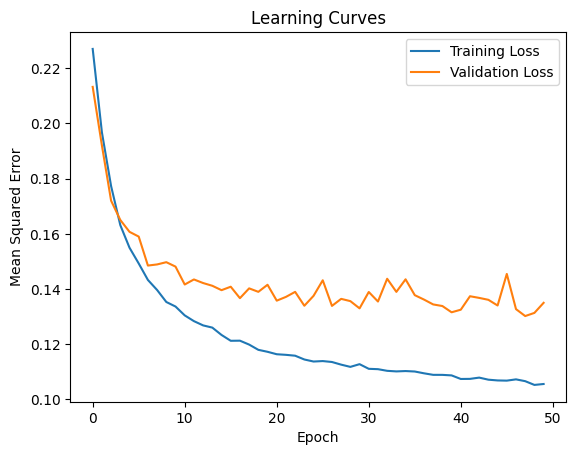

In [ ]:
# plot learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:

r2 = r2_score(y_test, y_pred)
print("R2 = ", r2)
print("Train MSE=  ", train_mse)
print("Test MSE=  ", test_mse)

R2 =  0.8578732870920052
Train MSE=   0.10244822986591792
Test MSE=   0.1350132063842812


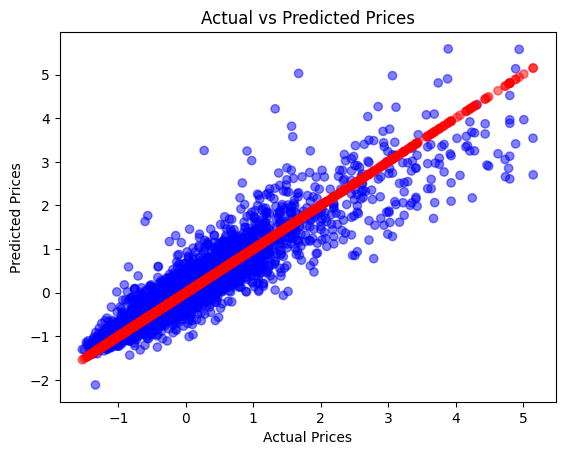

In [ ]:
# Plot the actual vs predicted values
plot_predictions(y_test, y_pred)

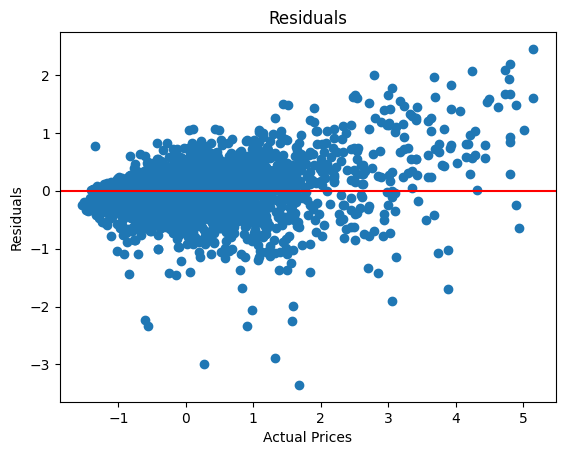

In [ ]:
# Plot the residuals
plot_residuals(y_test, y_pred)